In [25]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
#from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config
from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [27]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPotHighNoise/


In [28]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    print(f)
    if "Diff100_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_6_drift_est.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_2_drift_est.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_2_true_paths.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_4_true_drift.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_2_true_drift.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_4_true_paths.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_1_drift_est.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_6_true_paths.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_13_drift_est.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_1_true_paths.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_6_true_drift.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_1_true_drift.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_MSEs.parquet
/Users/marcos/Library/CloudStorage/OneDrive-I

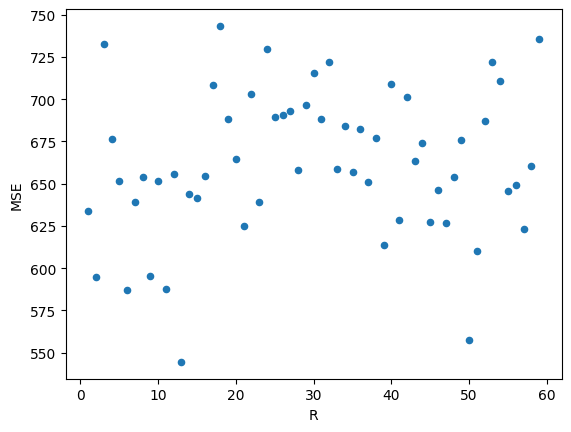

In [29]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [30]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

                0
index            
1      633.599631
2      595.010169
3      732.348442
4      676.292644
5      651.472867
6      587.156669
7      639.037104
8      653.901765
9      595.500195
10     651.579094
11     587.382724
12     655.685901
13     544.501522
14     643.602325
15     641.639756
16     654.505252
17     708.218364
18     743.327868
19     688.202152
20     664.871298
21     624.643587
22     703.145473
23     639.039692
24     729.682939
25     689.537445
26     690.572214
27     692.960637
28     658.308743
29     696.534821
30     715.741515
31     688.363736
32     721.799605
33     658.463140
34     684.110149
35     657.062197
36     682.302977
37     650.988716
38     676.977310
39     613.416108
40     709.176347
41     628.702633
42     701.382631
43     663.498425
44     674.320531
45     627.264994
46     646.341243
47     626.718406
48     654.127188
49     675.652826
50     557.368647
51     609.931451
52     686.953295
53     721.952881
54     710

In [31]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Ridge_f{diradd.replace('HighNoise', '')}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT_Diff{config.diffusion:.1f}".replace(".", "")
print(save_path)
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPotHighNoise/Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100


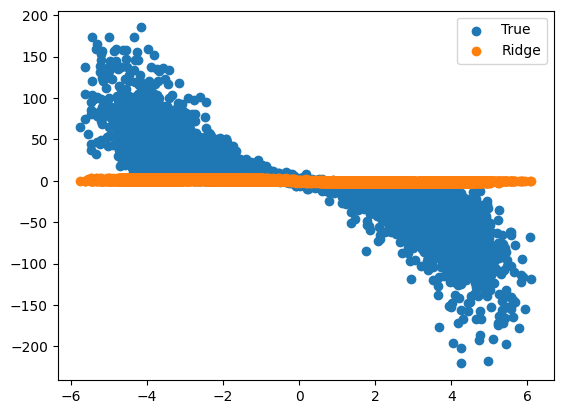

In [32]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()